In [110]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
%matplotlib inline

In [111]:
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")


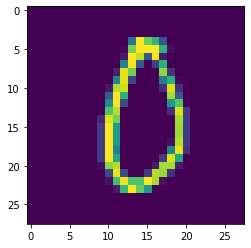

In [112]:
# having a look at the data... as images are 28x28 pixels..quality is blur.

gg=train.iloc[69,1:]
ggg=np.array(gg).reshape(28,28)
imgplot = plt.imshow(ggg)

In [113]:
training=np.array(train.iloc[:,1:])
training=training

In [114]:
labels=train.iloc[:,0:1]
labels=labels

In [115]:
# test train split...each column is an example..each row is a feature
X_train, X_test, y_train, y_test = train_test_split(training, labels, test_size=0.05, random_state=69)
X_train=X_train.T
X_test=X_test.T
y_train=y_train.T
y_test=y_test.T

In [116]:
# standardize inputs
X_train = X_train/255.
X_test =X_test/255.


In [117]:
# lets have a 6 layer nn with 5 nuerons in each layer...we can set this to any num later for optimiztion
layers=7
neurons_each_layer=8

In [118]:
# lets have a each intermiedtiate layer computing relu function a
# and output layer computing a sigmoid func
# thesr functions also output an cache ..which will be used during backprop

def relu(input):
    out=np.maximum(0,input)
    cache=out
    return out

def sigmoid(input):
    sig= 1/(1+np.exp(-input))
    cache=sig
    return  sig

In [119]:
# cachesss
W={}
B={}
Z={}
A={}
#z_cache={}
#a_cache={}

[4, 5, 5, 5, 5, 5, 1]


In [ ]:
# initialize parameters and bias w,b
#w is random while bias is initialized to 0
# W is dictioary containing the w1 w2 w3.. values same way B is dictionary
neurons_list=[]
#neurons_list.append(X_train.shape[0])
for i in  range(1,layers):
    a=input("Enter neurons in layer {}".format(i))
    a=int(a)
    neurons_list.append(a)

neurons_list.append(1)
print(neurons_list)

In [120]:
#init

for i,item in enumerate(neurons_list):
    if i==0:
        W["w0"]=np.random.randn(item,784)*.05
        B["b0"]=np.zeros((item,1))
    else:
        W["w"+str(i)]=np.random.randn(item,neurons_list[i-1])*.05
        B['b'+str(i)]=np.zeros((item,1))

#print(W["w{}".format(i)].shape)


In [121]:
def compute_cost(last_layers,truth_vals):
    m=truth_vals.shape[1]
    #//print(m)
    #print(last_layers.shape)
    cost=(np.sum((truth_vals*np.log(last_layers))+(1-truth_vals)*np.log(1-last_layers)))/-m
    cost = np.squeeze(cost)
    print("Cost is: "+str(cost))

In [122]:
# forward propagate

def forward_prop():
    for i,item in enumerate(neurons_list):
            if i==0:
                Z["z0"]=W["w0"].dot(X_train)+B["b0"]
                A['a0'],a_cache["a0"]=relu(Z["z0"])
            elif i==(len(neurons_list)-1):
                Z["z{}".format(i)]=W["w"+str(i)].dot(Z["z{}".format(i-1)])+B["b"+str(i)]
                A["a"+str(i)],a_cache["a"+str(i)]=sigmoid(Z["z"+str(i)])
            else:
                Z["z{}".format(i)]=W["w"+str(i)].dot(Z["z{}".format(i-1)])+B["b"+str(i)]
                A["a"+str(i)],a_cache["a"+str(i)]=relu(Z["z"+str(i)])

Cost is: 38434    0.000017
18057    0.000017
21320    0.000017
39492    0.000017
11315    0.000017
           ...   
37142    0.000017
11825    0.000017
25015    0.000017
9818     0.000017
4041     0.000017
Length: 39900, dtype: float64
Cost is: 38434    0.000017
18057    0.000017
21320    0.000017
39492    0.000017
11315    0.000017
           ...   
37142    0.000017
11825    0.000017
25015    0.000017
9818     0.000017
4041     0.000017
Length: 39900, dtype: float64
Cost is: 38434    0.000017
18057    0.000017
21320    0.000017
39492    0.000017
11315    0.000017
           ...   
37142    0.000017
11825    0.000017
25015    0.000017
9818     0.000017
4041     0.000017
Length: 39900, dtype: float64
Cost is: 38434    0.000017
18057    0.000017
21320    0.000017
39492    0.000017
11315    0.000017
           ...   
37142    0.000017
11825    0.000017
25015    0.000017
9818     0.000017
4041     0.000017
Length: 39900, dtype: float64
Cost is: 38434    0.000017
18057    0.000017
21320  

In [ ]:
def nn_model(Y,iterss=1500):
    for iterations in range(1,iterss):
        forward_prop()


        if (iterations%100==0):
            compute_cost(A["a6"],y_train)#+str(len(neurons_list)-1)

nn_model(y_train,1500)
print(A["a6"])


In [123]:
print(A["a0"])




[[0.         0.         0.33384031 ... 0.         0.         0.18630955]
 [0.20593447 0.42552632 0.13336906 ... 0.02359484 0.         0.13911058]
 [0.53300694 0.         0.20671467 ... 0.         0.         0.07169602]
 [0.02645196 0.         0.05433335 ... 0.27789294 0.31798456 0.        ]]
